In [1]:
import pandas as pd
reviews = pd.read_csv('manga_reviews.csv')
reviews

,Unnamed: 0,title,url,reviews
0,0,['Berserk'],https://myanimelist.net/manga/2/Berserk,"[""Story - 9.38\n\r\nThe first three volumes ma..."
1,1,['JoJo no Kimyou na Bouken Part 7: Steel Ball ...,https://myanimelist.net/manga/1706/JoJo_no_Kim...,['Serving as a soft reset for Jojo\'s Bizarre ...
2,2,['Vagabond'],https://myanimelist.net/manga/656/Vagabond,"['Some seinen manga, I believe, take the meani..."
3,3,['One Piece'],https://myanimelist.net/manga/13/One_Piece,['Frequently categorized with both Bleach and ...
4,4,['Monster'],https://myanimelist.net/manga/1/Monster,"[""I rarely give tens to mangas. But this one j..."
...,...,...,...,...
140,140,['Blue Lock'],https://myanimelist.net/manga/114745/Blue_Lock,"['Honestly, out of all the sports anime I have..."
141,141,['Given'],https://myanimelist.net/manga/79085/Given,['Given is a truly amazing story that features...
142,142,['Kakukaku Shikajika'],https://myanimelist.net/manga/44307/Kakukaku_S...,"['If you have read or watched Bakuman., you mi..."
143,143,['Mahoutsukai no Yoru'],https://myanimelist.net/manga/26027/Mahoutsuka...,"[""This is a review of the visual novel of Witc..."


In [2]:
!pip install transformers
from transformers import pipeline
sentiment_analysis_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [3]:
def analyze_sentiment(review):
    positive_count = 0
    negative_count = 0

    chunks = [review[i:i+512] for i in range(0, len(review), 512)]

    for chunk in chunks:
        results = sentiment_analysis_pipeline(chunk)
        for result in results:
            if result['label'] == 'POSITIVE':
                positive_count += 1
            elif result['label'] == 'NEGATIVE':
                negative_count += 1

    total_words = positive_count + negative_count
    if total_words == 0:
        return 'NEUTRAL'
    ratio = positive_count / total_words


    if ratio > 0.5:
        return 'POSITIVE'
    else:
        return 'NEGATIVE'
reviews['sentiment'] = reviews['reviews'].apply(analyze_sentiment)


In [4]:
reviews

,Unnamed: 0,title,url,reviews,sentiment
0,0,['Berserk'],https://myanimelist.net/manga/2/Berserk,"[""Story - 9.38\n\r\nThe first three volumes ma...",POSITIVE
1,1,['JoJo no Kimyou na Bouken Part 7: Steel Ball ...,https://myanimelist.net/manga/1706/JoJo_no_Kim...,['Serving as a soft reset for Jojo\'s Bizarre ...,POSITIVE
2,2,['Vagabond'],https://myanimelist.net/manga/656/Vagabond,"['Some seinen manga, I believe, take the meani...",POSITIVE
3,3,['One Piece'],https://myanimelist.net/manga/13/One_Piece,['Frequently categorized with both Bleach and ...,POSITIVE
4,4,['Monster'],https://myanimelist.net/manga/1/Monster,"[""I rarely give tens to mangas. But this one j...",POSITIVE
...,...,...,...,...,...
140,140,['Blue Lock'],https://myanimelist.net/manga/114745/Blue_Lock,"['Honestly, out of all the sports anime I have...",POSITIVE
141,141,['Given'],https://myanimelist.net/manga/79085/Given,['Given is a truly amazing story that features...,POSITIVE
142,142,['Kakukaku Shikajika'],https://myanimelist.net/manga/44307/Kakukaku_S...,"['If you have read or watched Bakuman., you mi...",POSITIVE
143,143,['Mahoutsukai no Yoru'],https://myanimelist.net/manga/26027/Mahoutsuka...,"[""This is a review of the visual novel of Witc...",POSITIVE


In [37]:
positive_review = ['POSITIVE']
positive = reviews['sentiment'].isin(positive_review)

positive_reviews_df = reviews.loc[positive, ['reviews','sentiment']].copy()

In [36]:
negative_review = ['NEGATIVE']
negative = reviews['sentiment'].isin(negative_review)

negative_reviews_df = reviews.loc[negative, ['sentiment', 'reviews']].copy()

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert the 'reviews' column to a single string for negative and positive reviews
negative_reviews_text = ' '.join(negative_reviews_df['reviews'])
positive_reviews_text = ' '.join(positive_reviews_df['reviews'])

# Generate word clouds for negative and positive reviews
wordcloud_negative = WordCloud(width=800, height=400).generate(negative_reviews_text)
wordcloud_positive = WordCloud(width=800, height=400).generate(positive_reviews_text)

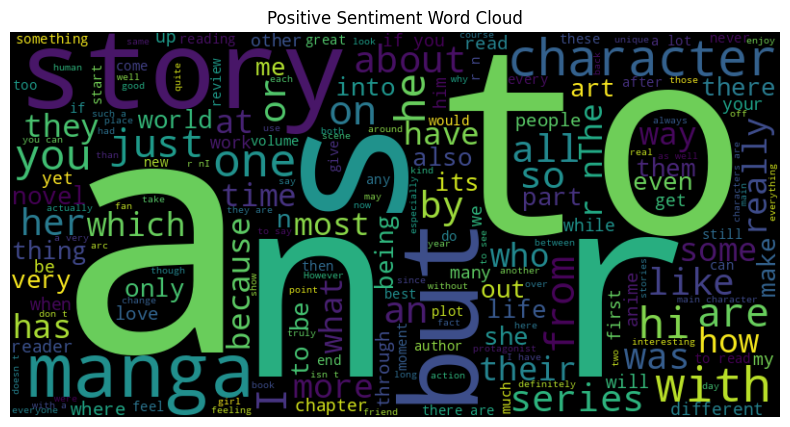

In [34]:

positive_stopwords = ['the', 'and', 'is', 'it', 'in', 'of','does', 'this', 'that', 'for','no','not']

wordcloud_positive = WordCloud(width=800, height=400, stopwords=positive_stopwords).generate(positive_reviews_text)

# Plot the word cloud for negative reviews
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive Sentiment Word Cloud')
plt.axis('off')
plt.show()


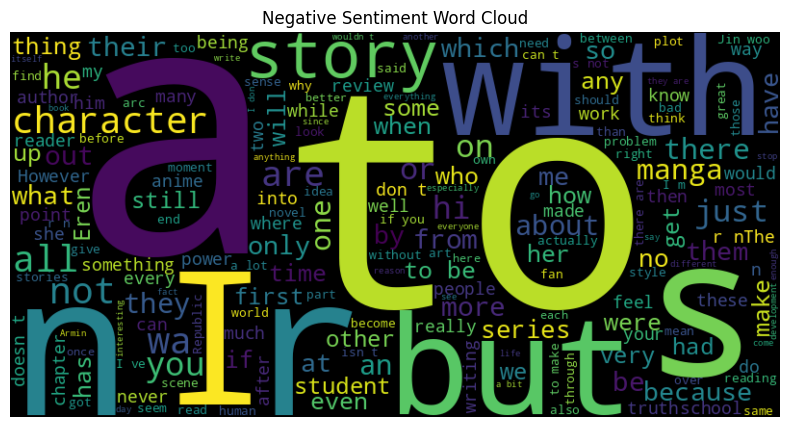

In [43]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

negative_stopwords = ['the', 'and', 'is', 'it', 'in', 'of','does', 'this', 'that', 'for','good','like','love','always']

wordcloud_negative = WordCloud(width=800, height=400, stopwords=negative_stopwords).generate(negative_reviews_text)

# Plot the word cloud for negative reviews
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative Sentiment Word Cloud')
plt.axis('off')
plt.show()


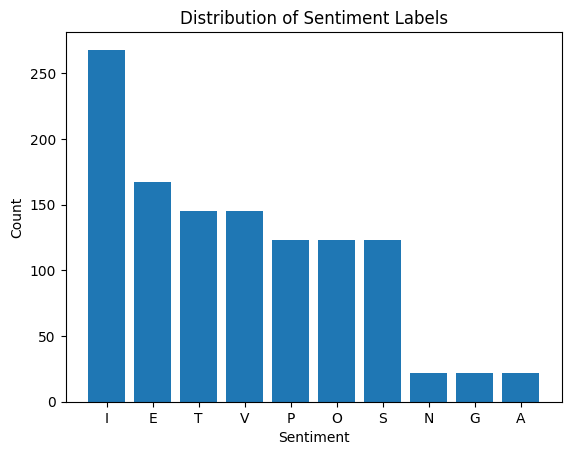

In [38]:
import matplotlib.pyplot as plt
flat_sentiments = [sentiment for sublist in reviews['sentiment'] for sentiment in sublist]
sentiment_counts = pd.Series(flat_sentiments).value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiment Labels')
plt.show()
# Sentiment classification:
# i: Positive
# e: Negative
# v: Neutral
# t: Very Positive
# o: Very Negative
# p: Positive
# s: Somewhat Positive
# n: Neutral
# g: Somewhat Negative
# a: Very Positive


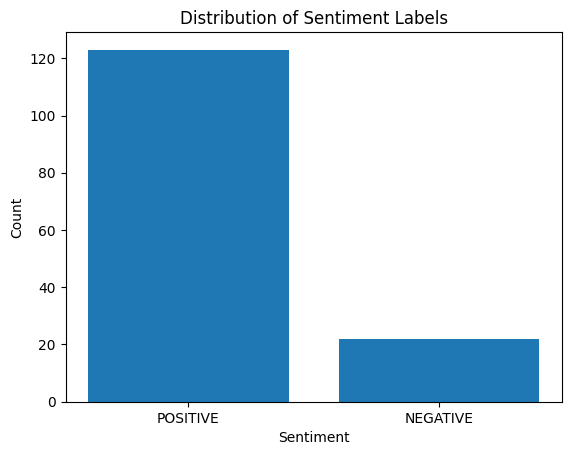

In [39]:
sentiment_counts = reviews['sentiment'].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiment Labels')
plt.show()

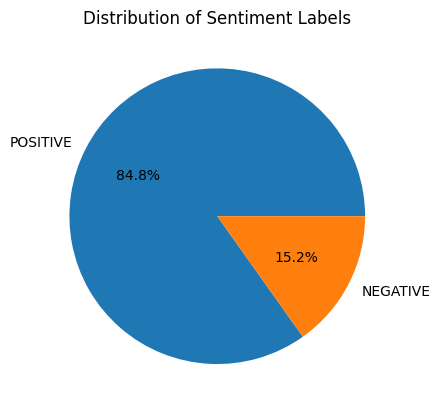

In [40]:
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Sentiment Labels')
plt.show()

In [41]:
sentiment_distribution = reviews['sentiment'].apply(pd.Series).stack().value_counts()
print(sentiment_distribution)

POSITIVE    123
NEGATIVE     22
Name: count, dtype: int64


In [42]:
# Save the DataFrame to a CSV file
reviews.to_csv('sentiment_analysis.csv', index=False)